In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
patient_data = pd.read_csv("C:/Users/VANSH KHANEJA/Downloads/archive (32)/heart.csv")

In [30]:
patient_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

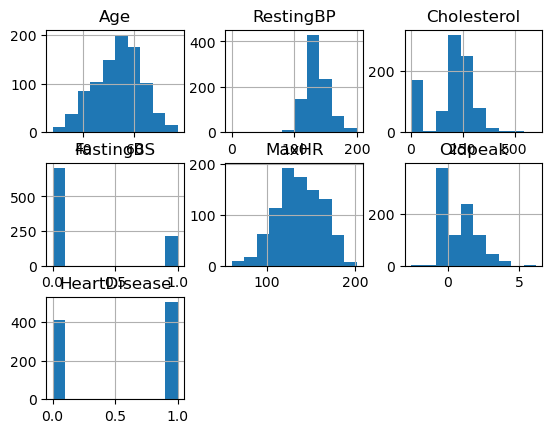

In [31]:
patient_data.hist()

In [32]:
patient_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

array([<Axes: title={'center': 'HeartDisease'}>], dtype=object)

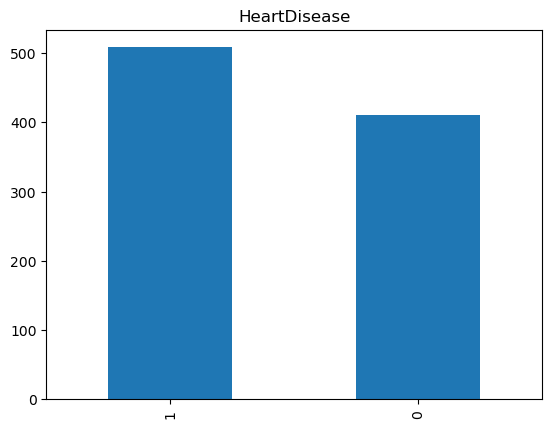

In [33]:
patient_data['HeartDisease'].value_counts().plot(kind='bar',subplots=True)

In [34]:
data_with_dummies = pd.get_dummies(patient_data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [35]:
data_with_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [12]:
X = data_with_dummies.drop(['HeartDisease'],axis=1)
y = data_with_dummies['HeartDisease']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X_train,y_train)

C:\Users\VANSH KHANEJA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
lr.score(X_test,y_test)

0.8782608695652174

In [17]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round((svc_classifier.score(X_test, y_test))*100,2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

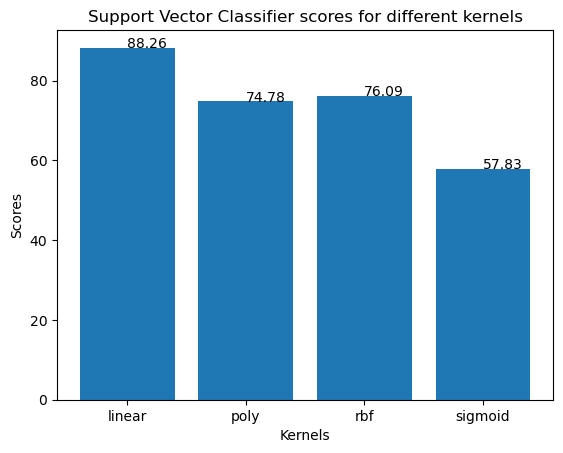

In [18]:
plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [19]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0], 'linear'))


The score for Support Vector Classifier is 88.26% with linear kernel.


In [20]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round((dt_classifier.score(X_test, y_test))*100,2))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

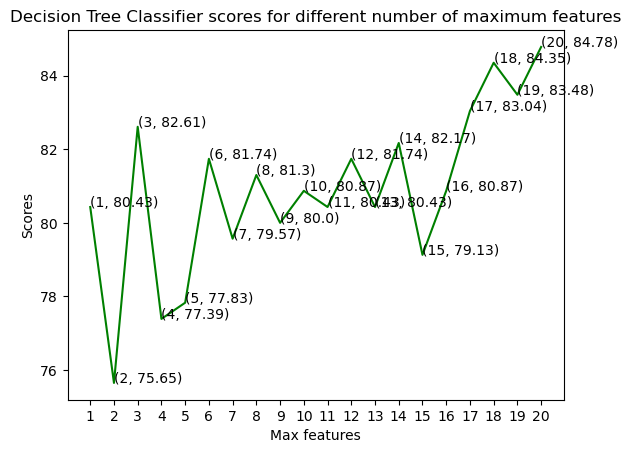

In [21]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [22]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17], [3]))


The score for Decision Tree Classifier is 84.35% with [3] maximum features.


In [23]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(round((rf_classifier.score(X_test, y_test))*100,2))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

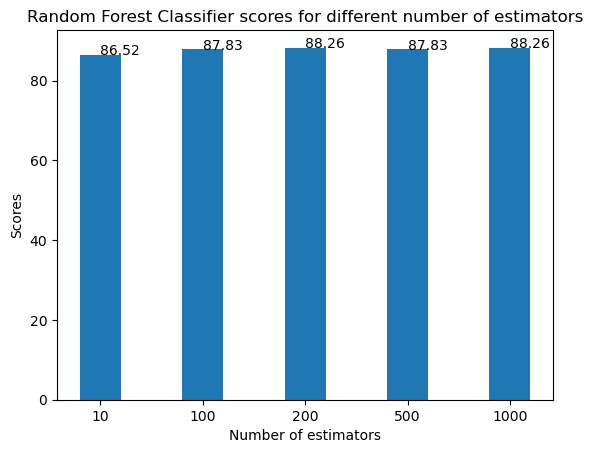

In [38]:
plt.bar([i for i in range(len(estimators))], rf_scores, width = 0.4)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [27]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1], [100]))

The score for Random Forest Classifier is 87.83% with [100] estimators.
